In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

## 1. Looking at the data

In [3]:
file_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df.sample()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
377  378          60       FV        102.0    11143   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
377         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
377     12   2007        WD         Normal     340000  

[1 rows x 81 columns]

In [6]:
df.shape

(1460, 81)

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df = df.drop(columns=['Id'])

In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## 2. Working with missing values

In [11]:
pd.set_option('display.max_rows', None)
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

I decided to delete rows with too many missing values because they can make the model work incorrectly

In [12]:
df = df.drop(columns=['Alley', 'LotFrontage', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [13]:
# fill in the missing values in numerical rows with the average
df[['MasVnrArea', 'GarageYrBlt']] = df[['MasVnrArea', 'GarageYrBlt']].fillna(df[['MasVnrArea', 'GarageYrBlt']].mean())

In [14]:
# fill in the missing values in object and categorical rows with the most popular value
cols_to_fill = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in cols_to_fill:
    mode_value = df[col].mode()[0] 
    df[col] = df[col].fillna(mode_value) 

In [15]:
df = df.drop_duplicates()

## 3. Analysis the data distribution

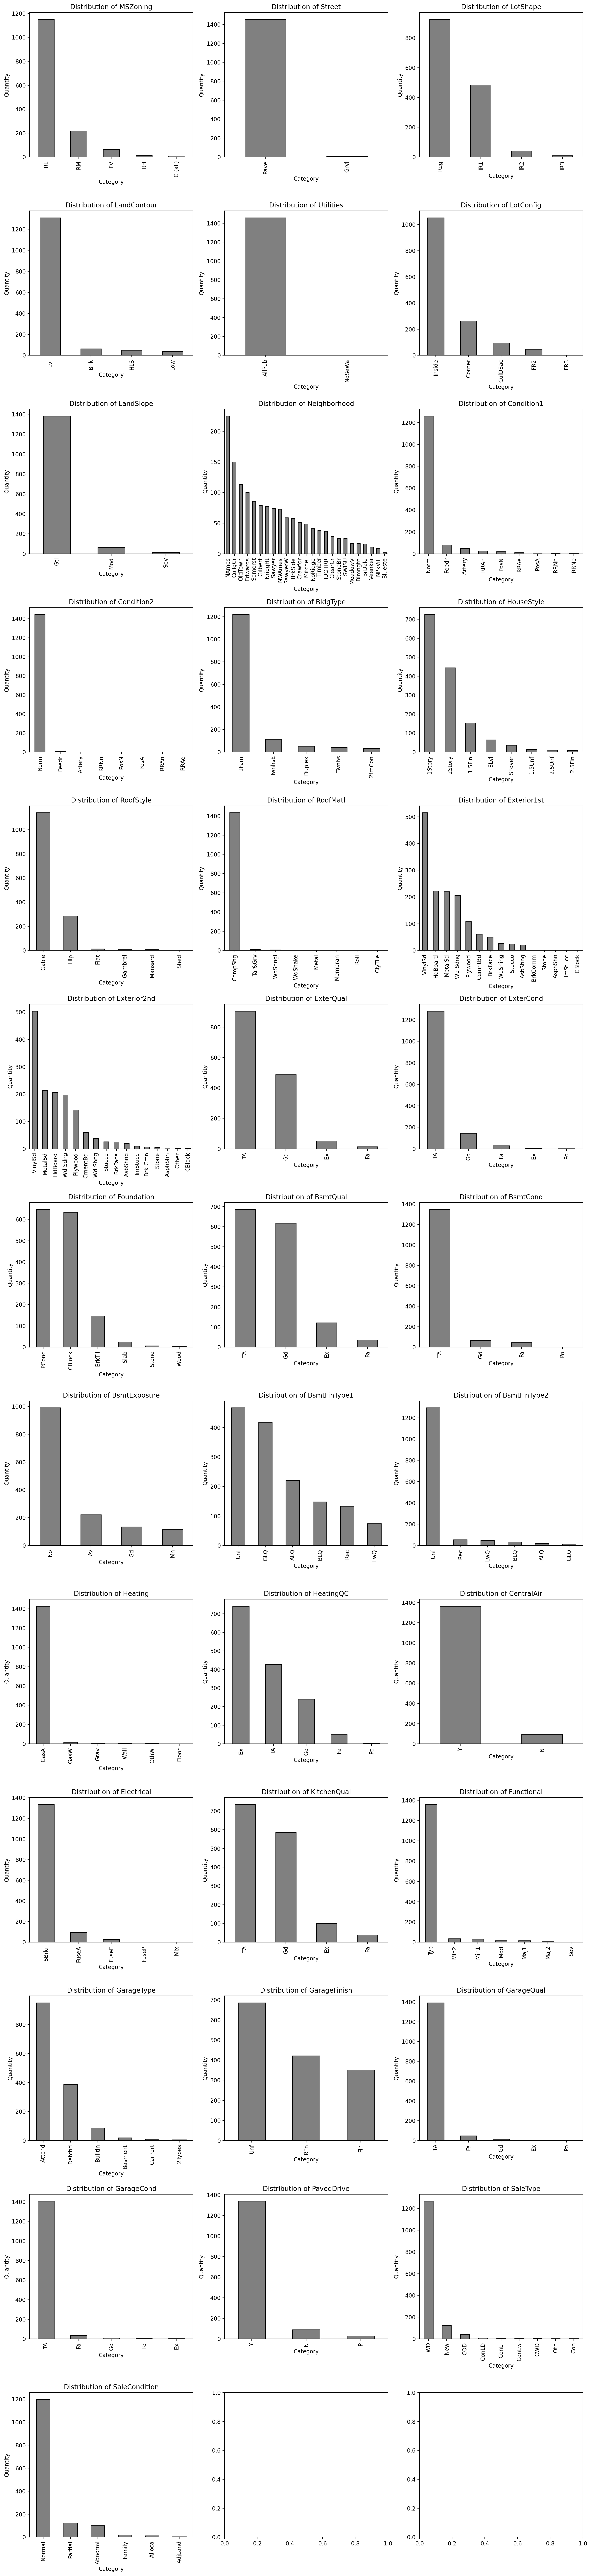

In [16]:
# categorical data
df_cat =  df.select_dtypes(include=['object', 'category']).columns
num_col = len(df_cat)
num_rows = math.ceil(num_col / 3)  
num_cols = min(3, num_col)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()
for i, col in enumerate(df_cat):
        df[col].value_counts().plot.bar(
            ax=axes[i],  
            color='grey',  
            edgecolor='black'  
        )
        axes[i].set_title(f'Distribution of {col}') 
        axes[i].set_ylabel('Quantity')  
        axes[i].set_xlabel('Category') 

plt.tight_layout()  
plt.show()

I decided to delet the features with severe imbalance because:
1) they may cause the model to be retrained
2) there is a good chance there is a lot of noise

In [17]:
df = df.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'Functional', 'GarageCond'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

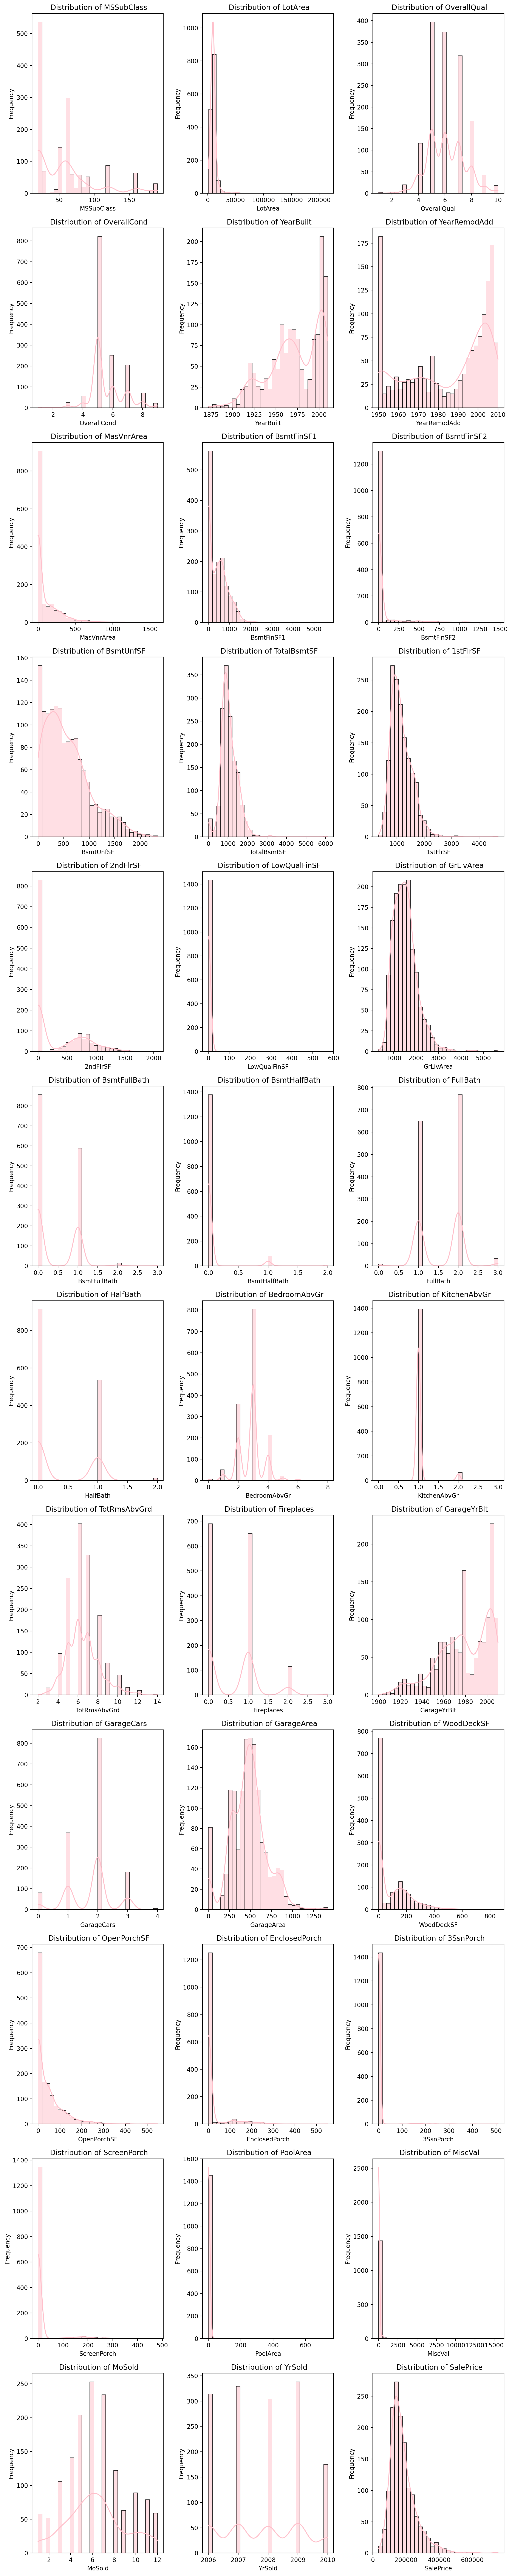

In [18]:
# numerical data
df_num = df.select_dtypes(include=['number']).columns
num_col = len(df_num)
num_rows = math.ceil(num_col / 3)
num_cols = min(3, num_col)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))
axes = axes.flatten()
for i, col in enumerate(df_num, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[col], kde=True, color='pink', bins=30)
        plt.title(f' Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frequency')
plt.tight_layout()  
plt.show()

In [19]:
df = df.drop(columns=['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'])

In [20]:
# the range of value of the 'SalePrice'
min_value = df['SalePrice'].min()
max_value = df['SalePrice'].max()

print(f"the range of value: {min_value} - {max_value}")

the range of value: 34900 - 755000


## 4. Data outliers and anomalies

In [21]:
df_num = df.select_dtypes(include=['number']).columns  
for col in df_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(col , "quantity of outliers", outliers_after.shape[0])

MSSubClass quantity of outliers 0
LotArea quantity of outliers 0
OverallQual quantity of outliers 0
OverallCond quantity of outliers 0
YearBuilt quantity of outliers 0
YearRemodAdd quantity of outliers 0
MasVnrArea quantity of outliers 0
BsmtFinSF1 quantity of outliers 0
BsmtFinSF2 quantity of outliers 0
BsmtUnfSF quantity of outliers 0
TotalBsmtSF quantity of outliers 0
1stFlrSF quantity of outliers 0
2ndFlrSF quantity of outliers 0
GrLivArea quantity of outliers 0
BsmtFullBath quantity of outliers 0
BsmtHalfBath quantity of outliers 0
FullBath quantity of outliers 0
HalfBath quantity of outliers 0
BedroomAbvGr quantity of outliers 0
KitchenAbvGr quantity of outliers 0
TotRmsAbvGrd quantity of outliers 0
Fireplaces quantity of outliers 0
GarageYrBlt quantity of outliers 0
GarageCars quantity of outliers 0
GarageArea quantity of outliers 0
WoodDeckSF quantity of outliers 0
OpenPorchSF quantity of outliers 0
EnclosedPorch quantity of outliers 0
ScreenPorch quantity of outliers 0
MoSold 

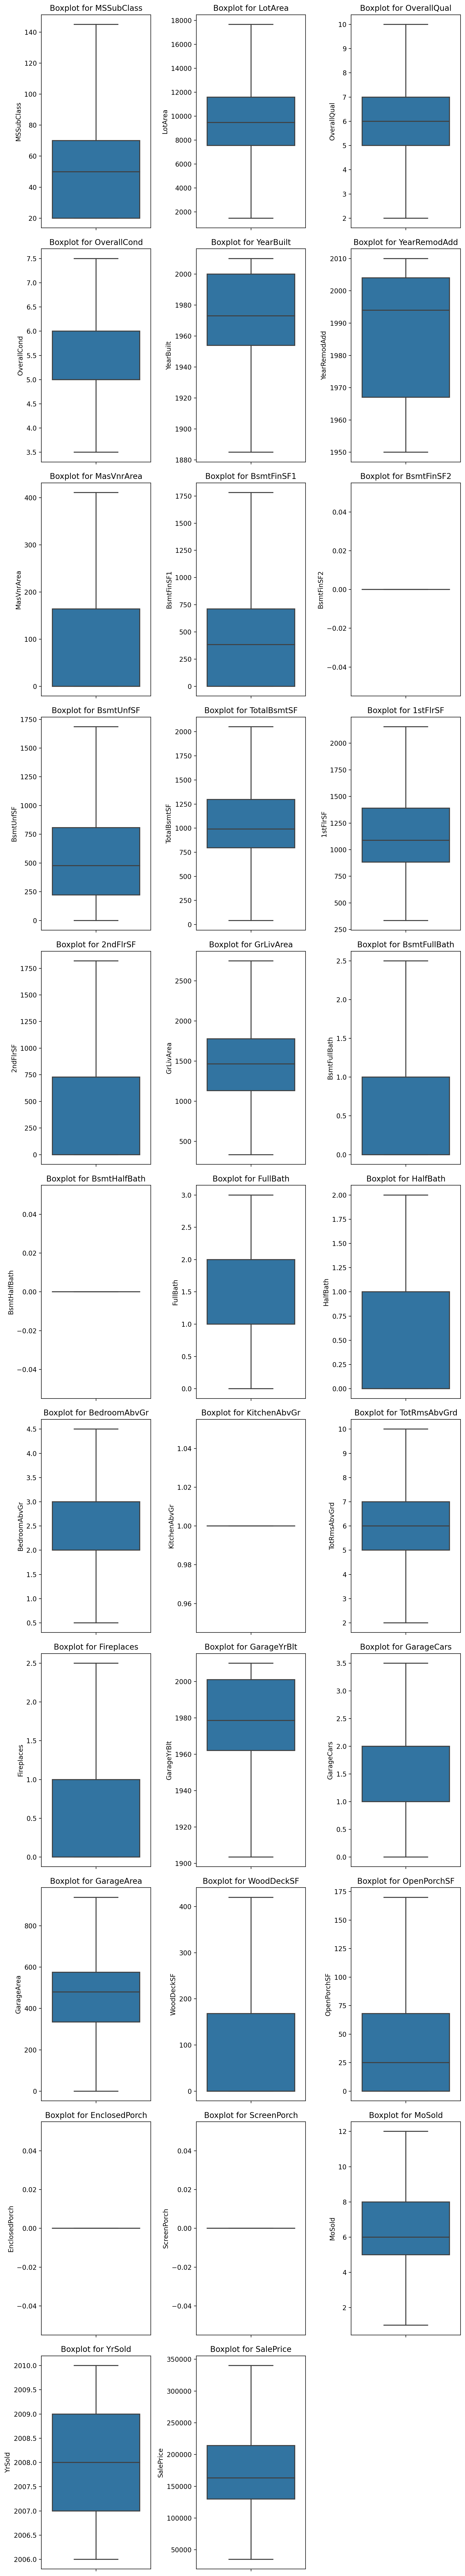

In [22]:
num_cols = len(df_num)  
num_rows = (num_cols + 2) // 3  

plt.figure(figsize=(10, num_rows * 5))
for i, col in enumerate(df_num):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(y=df[col]) 
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## 5. Correlation 

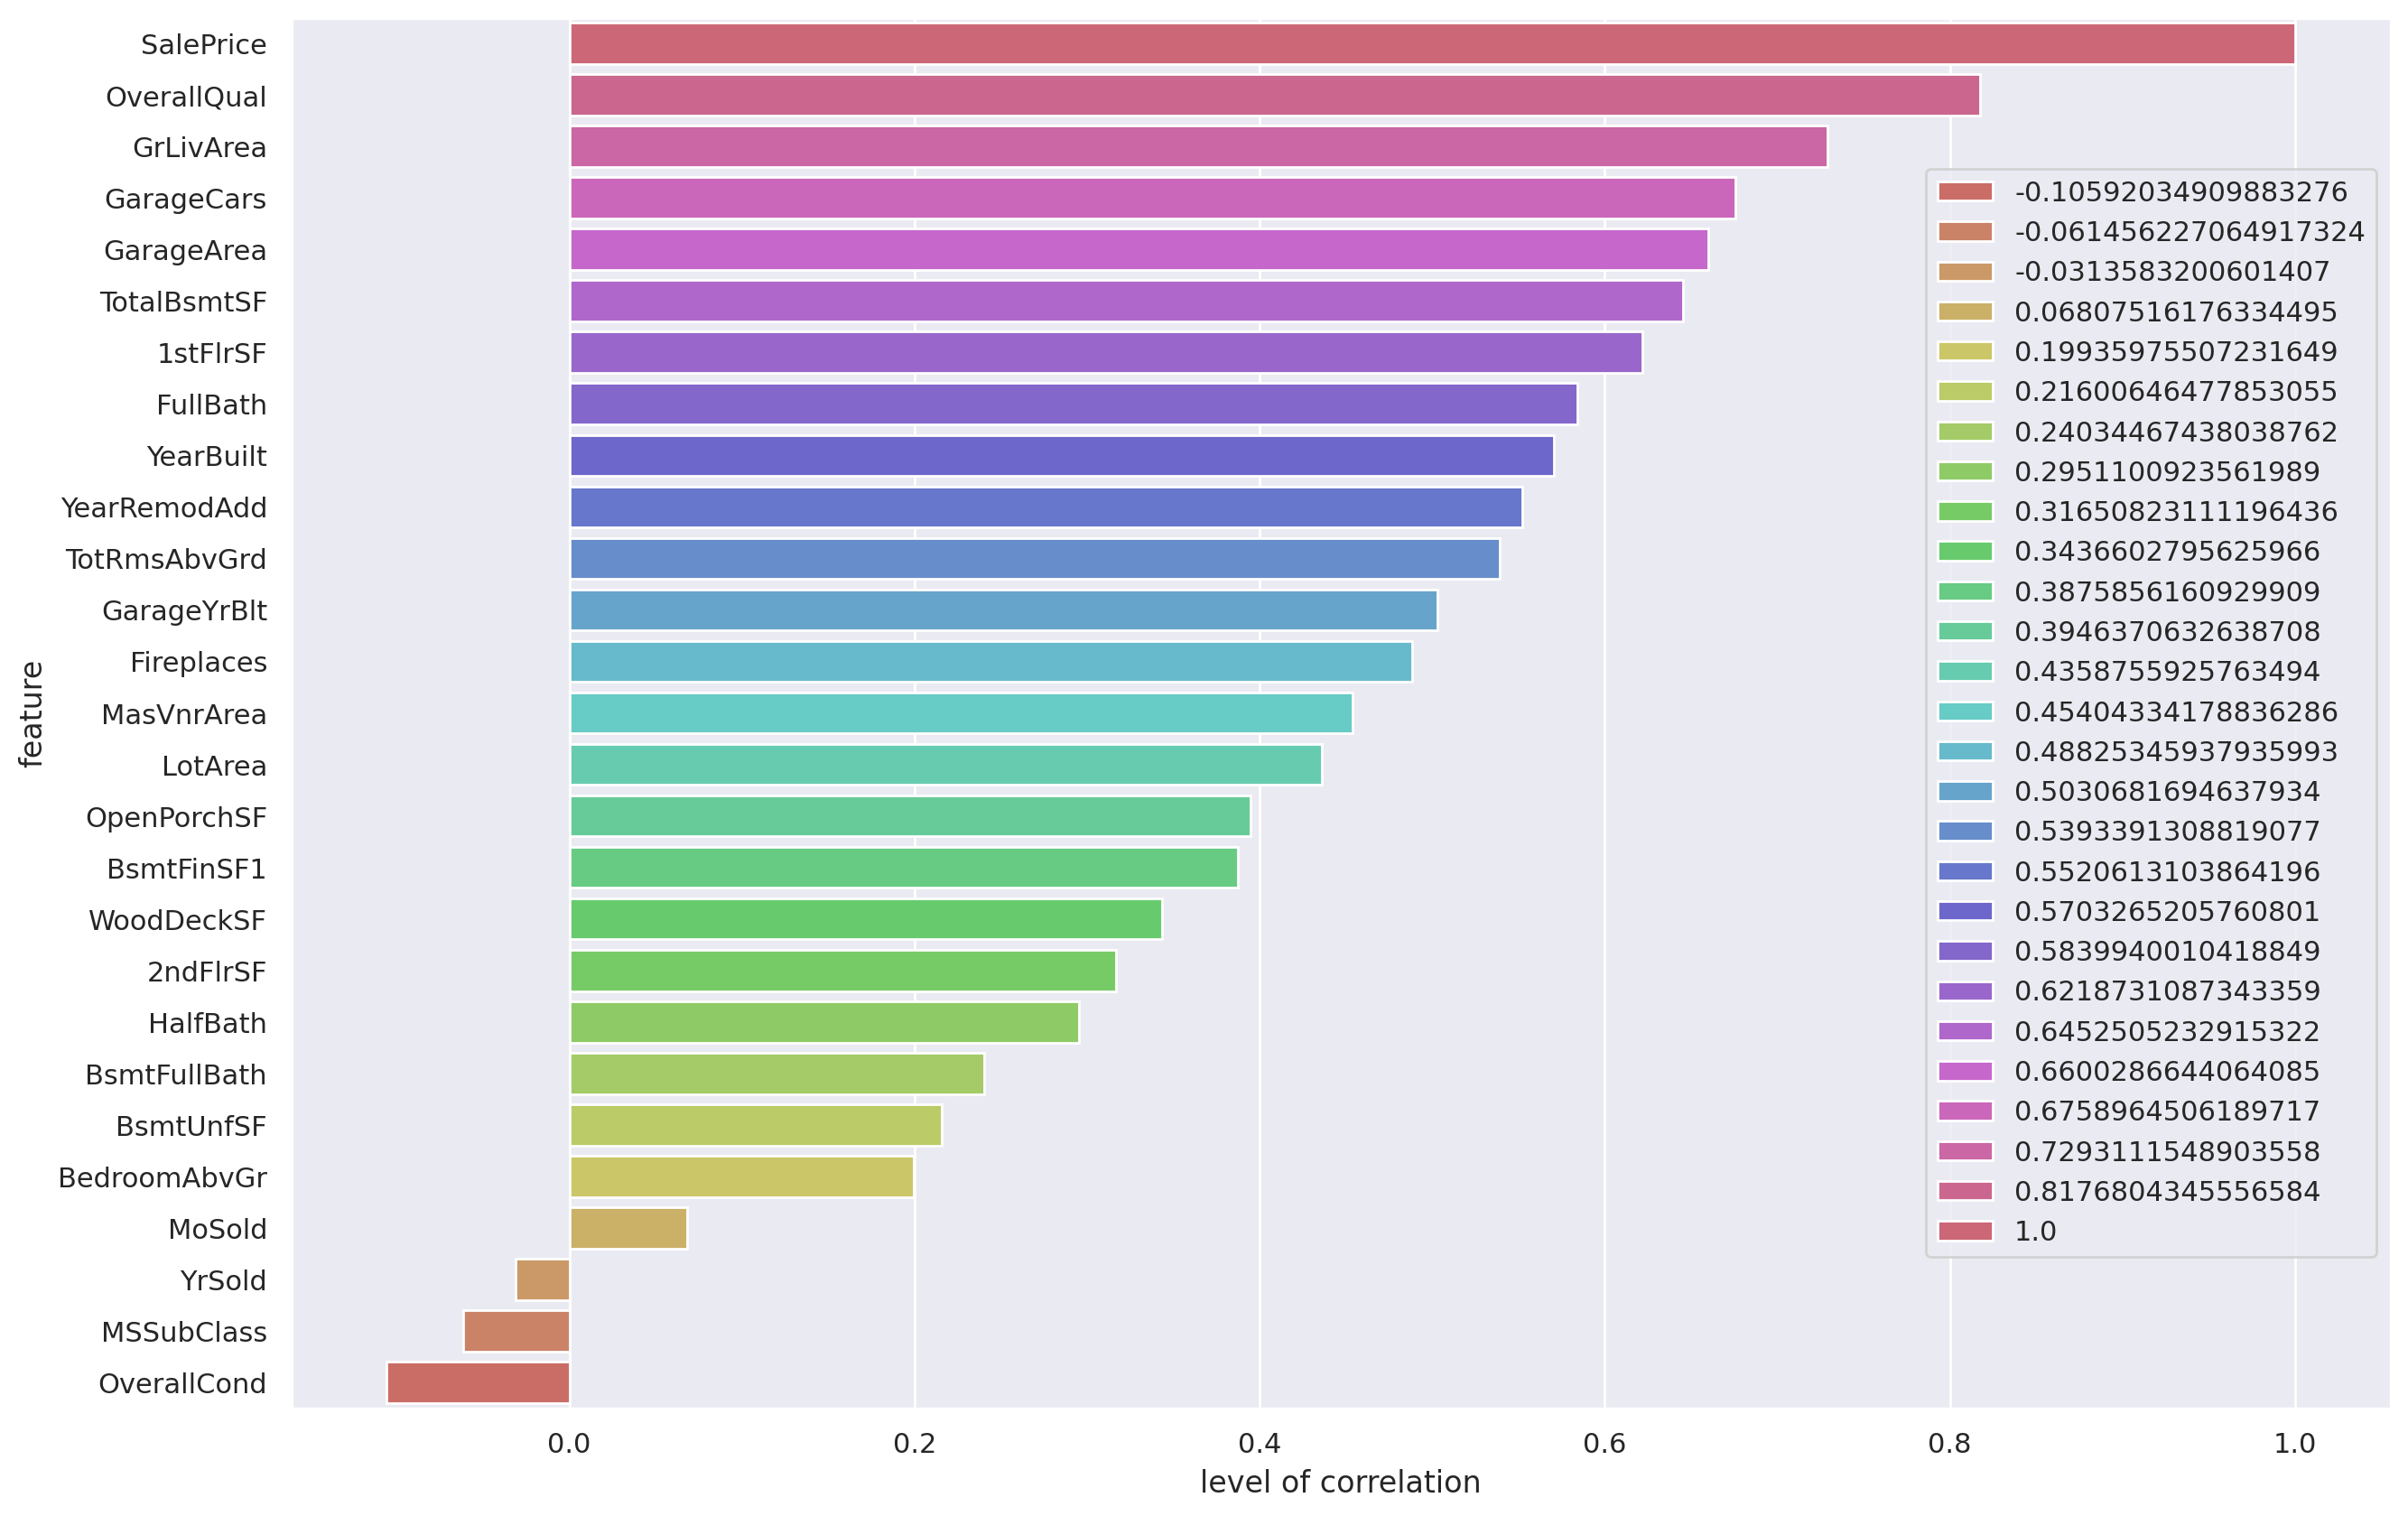

In [23]:
df_num = df.select_dtypes(include=['number'])
df_num_mean = df_num.mean()
df_num_features = df_num.columns

df_num_no_const = df_num.loc[:, df_num.std() > 0]  
corr = df_num_no_const.corrwith(df['SalePrice']).sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.set(style="darkgrid")


sns.barplot(y=corr.index, x=corr, palette='hls', hue=corr, dodge=False)
plt.xlabel('level of correlation')
plt.ylabel('feature')
plt.show()

We can see that the three most influencing factors with positive correlation on the target variable are OverallQual, GrLivArea, and GarageCars.

## 6. Linear regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [25]:
y = df["SalePrice"]
X = df.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [26]:
num_df = X_train.select_dtypes([np.number])
num_df_mean = num_df.mean()
num_features = num_df.columns
categor = df.select_dtypes(include=['object']).columns

In [27]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categor),
    ('scaling', StandardScaler(), num_features)
])

pipeline = Pipeline(steps=[                           
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Test RMSE = %.4f" % test_rmse)
print("Train RMSE = %.4f" % train_rmse)

Test RMSE = 20741.0944
Train RMSE = 17633.0343


In [28]:
def show_weights(pipeline):
    model = pipeline.named_steps['regression']
    weights = model.coef_
    feature_names = pipeline.named_steps['ohe_and_scaling'].get_feature_names_out()
    scaler = pipeline.named_steps['ohe_and_scaling'].transformers_[1][1] 
    scales = scaler.scale_ 
    sorted_weights = sorted(zip(weights, feature_names, scales), key=lambda x: x[0], reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]

    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    axs[0].set_title("Feature Weights")
    
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    axs[1].set_title("Feature Scales")
    
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


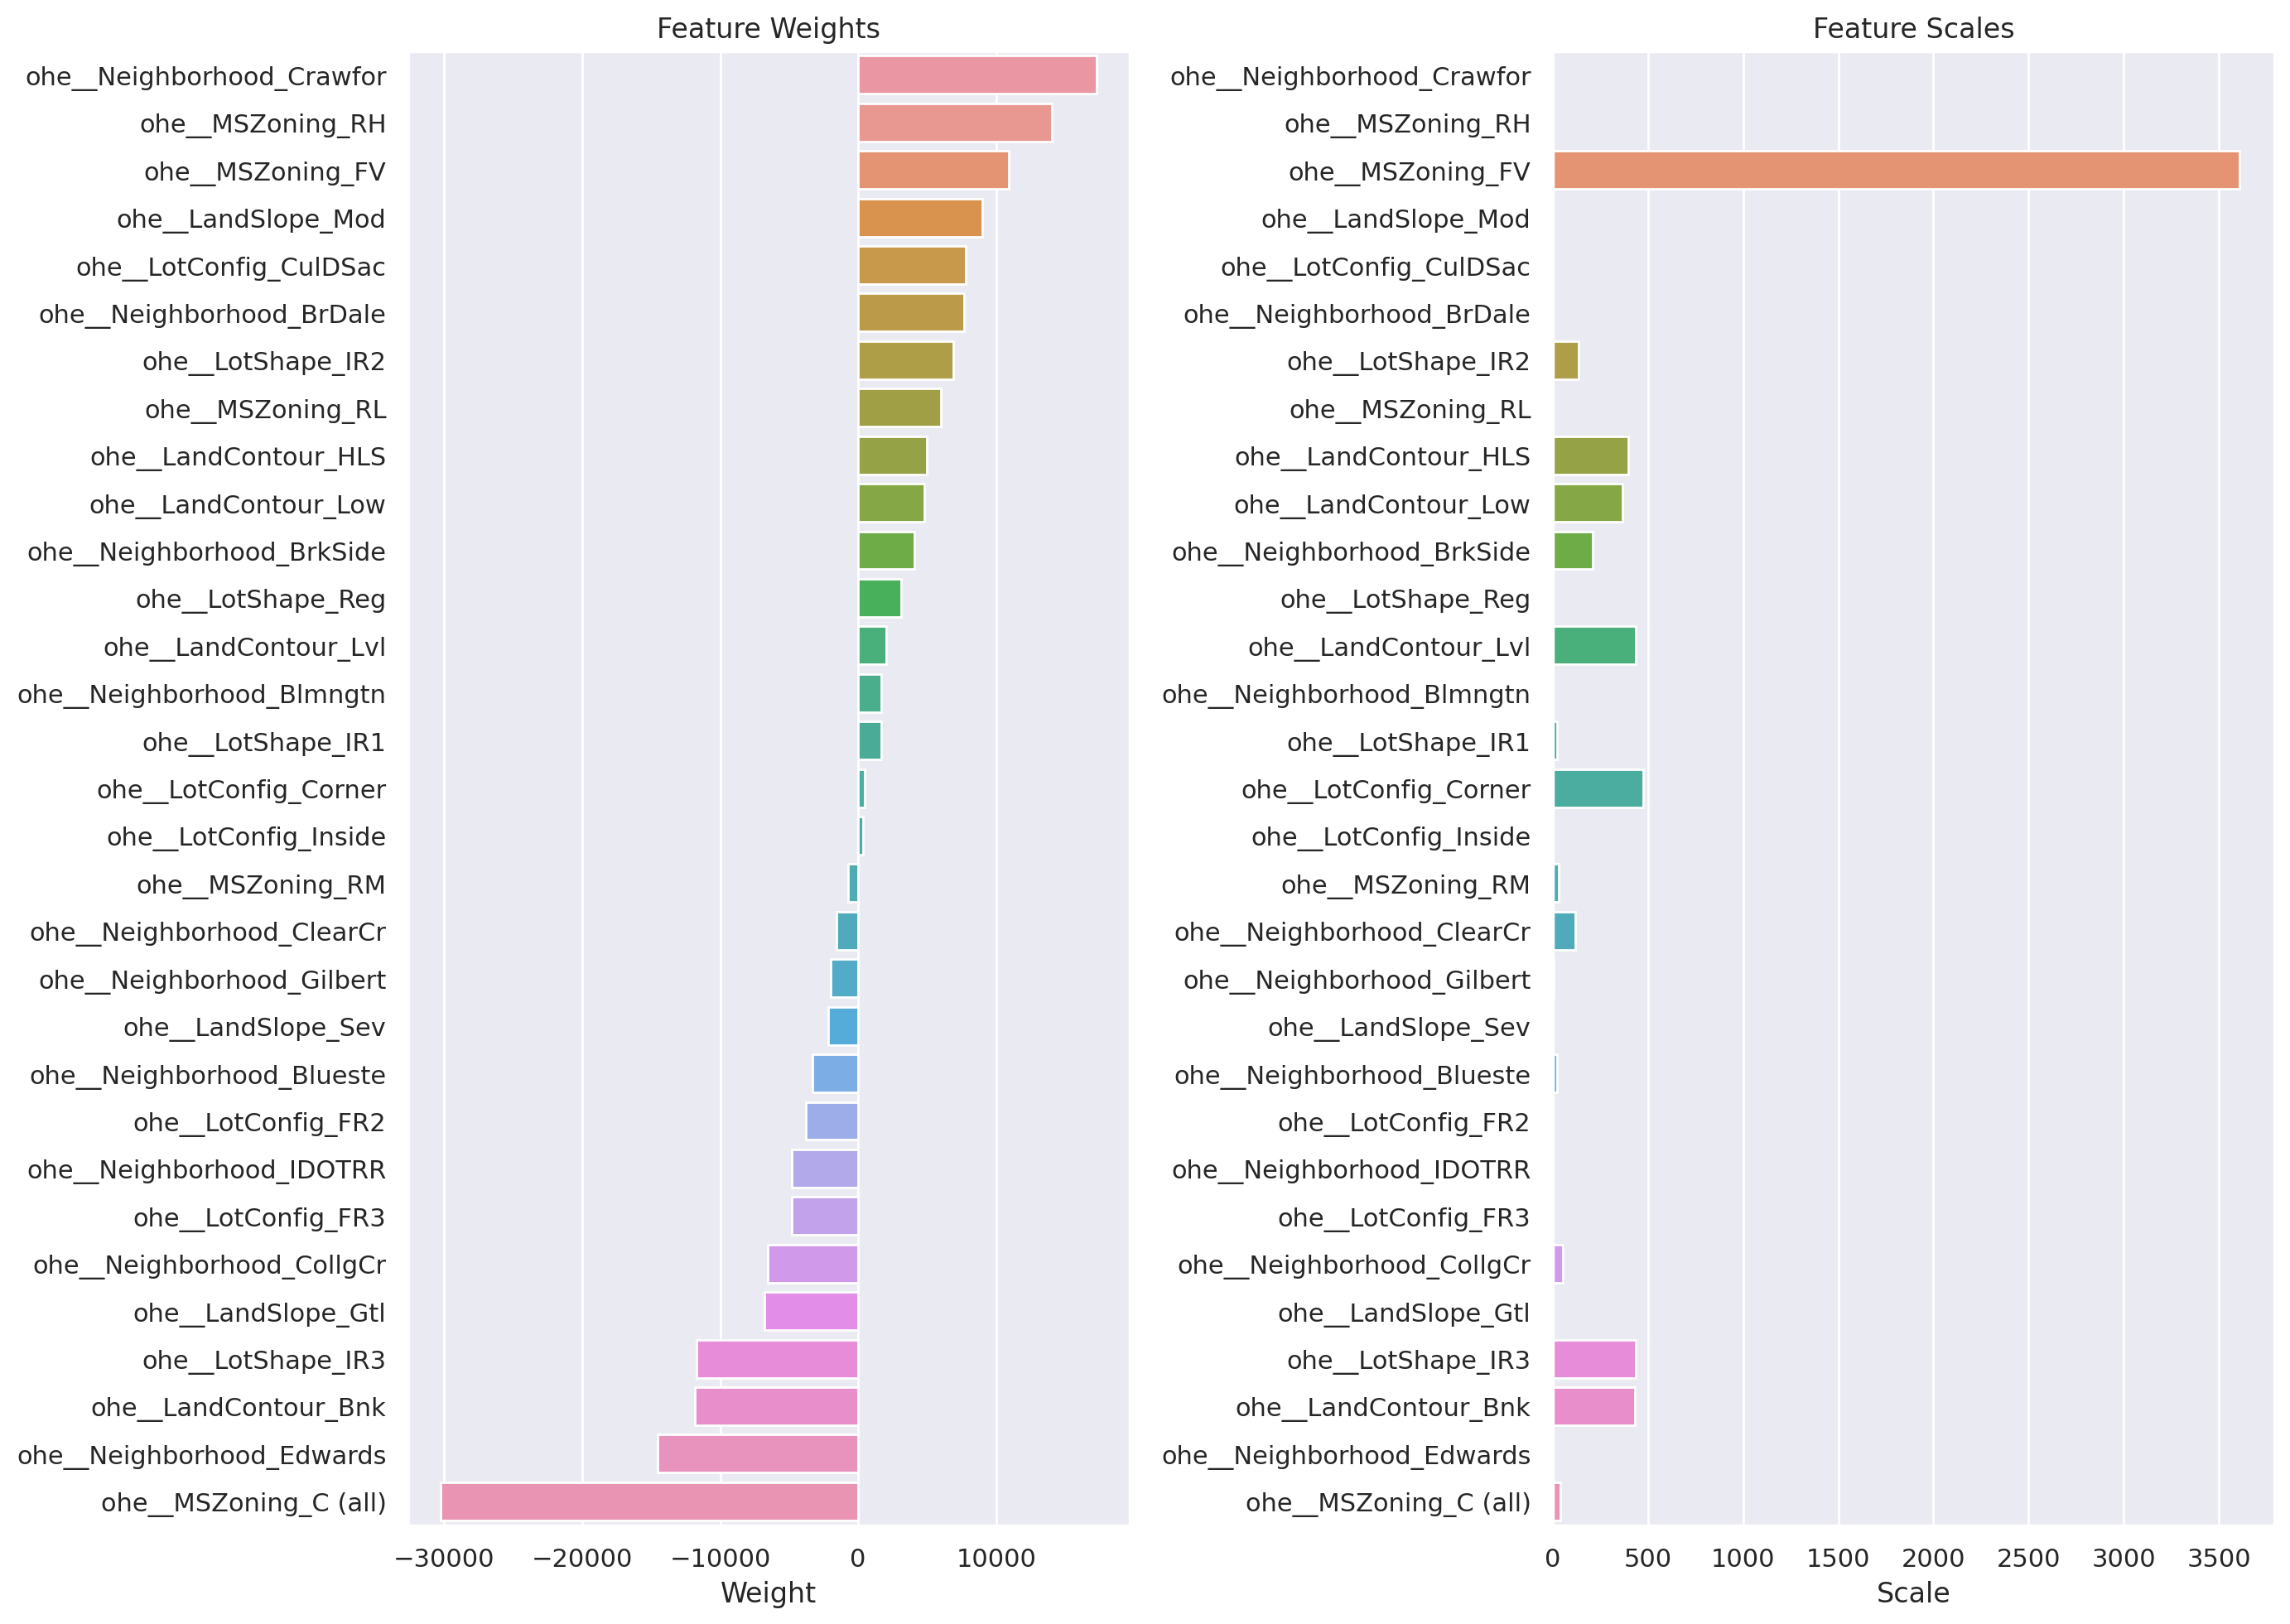

In [29]:
show_weights(pipeline)